In [1]:
def EDA(df):
    total_na = df.isna().sum().sum()
    print('Dimensions:', df.shape[0], ' - rows', df.shape[1], ' - columns')
    print('Total NA\'s', total_na)
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "Count Distinct", "NA Values"))
    col_name = df.columns
    dtypes = df.dtypes
    uniq = df.nunique()
    na_val = df.isna().sum()
    for i in range(len(df.columns)):
        print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, precision_score, recall_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

In [3]:


df_foot = pd.read_csv('D:\TEMP\Course/fifa23_players.csv')
EDA(df_foot)

Dimensions: 19239  - rows 80  - columns
Total NA's 152557
                           Column Name  Data Type     Count Distinct  NA Values
                             sofifa_id      int64          19239          0
                            player_url     object          19239          0
                            short_name     object          18145          0
                             long_name     object          19219          0
                      player_positions     object            674          0
                               overall      int64             47          0
                             potential      int64             46          0
                             value_eur    float64            252         74
                              wage_eur    float64            133         61
                                   age      int64             29          0
                                   dob     object           6312          0
                          

C:\Users\Genia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (24,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1 = df_foot[['short_name','player_positions' ,'overall', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position',
         'club_name','league_name','league_level','club_loaned_from','club_joined', 'club_jersey_number', 'club_contract_valid_until', 'nationality_name', 'nation_team_id', 
         'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
         'international_reputation', 'work_rate', 'body_type', 'release_clause_eur', 'player_tags',
         'player_traits', 'pace','shooting','passing','dribbling','defending','physic',
         'attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
         'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
         'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
         'movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
         'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
         'mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
         'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
         'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed','player_face_url',
              'club_logo_url','nation_logo_url','nation_flag_url']]
EDA(df1)

Dimensions: 19239  - rows 74  - columns
Total NA's 152496
                           Column Name  Data Type     Count Distinct  NA Values
                            short_name     object          18145          0
                      player_positions     object            674          0
                               overall      int64             47          0
                             value_eur    float64            252         74
                              wage_eur    float64            133         61
                                   age      int64             29          0
                             height_cm      int64             49          0
                             weight_kg      int64             58          0
                         club_position     object             29         61
                             club_name     object            701         61
                           league_name     object             55         61
                          

In [5]:
df1.head()

,short_name,player_positions,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_position,club_name,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,nation_logo_url,nation_flag_url
0,L. Messi,"RW, ST, CF",93,78000000.0,320000.0,34,170,72,RW,Paris Saint-Germain,...,6,11,15,14,8,NaN,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,R. Lewandowski,ST,92,119500000.0,270000.0,32,185,81,ST,FC Bayern München,...,15,6,12,8,10,NaN,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,Cristiano Ronaldo,"ST, LW",91,45000000.0,270000.0,36,187,83,ST,Manchester United,...,7,11,15,14,11,NaN,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,Neymar Jr,"LW, CAM",91,129000000.0,270000.0,29,175,68,LW,Paris Saint-Germain,...,9,9,15,15,11,NaN,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,NaN,https://cdn.sofifa.net/flags/br.png
4,K. De Bruyne,"CM, CAM",91,125500000.0,350000.0,30,181,70,RCM,Manchester City,...,15,13,5,10,13,NaN,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


1. Топ 100 гравців з найвищим рейтингом

In [6]:
df1.nlargest(100, 'overall')#['short_name']

,short_name,player_positions,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_position,club_name,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,nation_logo_url,nation_flag_url
0,L. Messi,"RW, ST, CF",93,78000000.0,320000.0,34,170,72,RW,Paris Saint-Germain,...,6,11,15,14,8,NaN,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,R. Lewandowski,ST,92,119500000.0,270000.0,32,185,81,ST,FC Bayern München,...,15,6,12,8,10,NaN,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,Cristiano Ronaldo,"ST, LW",91,45000000.0,270000.0,36,187,83,ST,Manchester United,...,7,11,15,14,11,NaN,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,Neymar Jr,"LW, CAM",91,129000000.0,270000.0,29,175,68,LW,Paris Saint-Germain,...,9,9,15,15,11,NaN,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,NaN,https://cdn.sofifa.net/flags/br.png
4,K. De Bruyne,"CM, CAM",91,125500000.0,350000.0,30,181,70,RCM,Manchester City,...,15,13,5,10,13,NaN,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A. Hakimi,"RB, RWB",85,69500000.0,100000.0,22,181,73,RB,Paris Saint-Germain,...,10,8,14,6,8,NaN,https://cdn.sofifa.net/players/235/212/22_120.png,https://cdn.sofifa.net/teams/73/60.png,NaN,https://cdn.sofifa.net/flags/ma.png
96,M. de Ligt,CB,85,75000000.0,81000.0,21,189,89,LCB,Juventus,...,12,11,11,12,10,NaN,https://cdn.sofifa.net/players/235/243/22_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
97,Z. Ibrahimović,ST,84,14500000.0,51000.0,39,195,95,SUB,AC Milan,...,13,15,10,9,12,NaN,https://cdn.sofifa.net/players/041/236/22_120.png,https://cdn.sofifa.net/teams/47/60.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
98,Jesús Navas,"RB, RM",84,13000000.0,30000.0,35,172,60,RB,Sevilla FC,...,10,10,15,7,13,NaN,https://cdn.sofifa.net/players/146/536/22_120.png,https://cdn.sofifa.net/teams/481/60.png,NaN,https://cdn.sofifa.net/flags/es.png


2. Топ 100 гравців з найвищими зарплатами.

In [7]:
df1.nlargest(100, 'wage_eur')#['short_name']

,short_name,player_positions,overall,value_eur,wage_eur,age,height_cm,weight_kg,club_position,club_name,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,club_logo_url,nation_logo_url,nation_flag_url
4,K. De Bruyne,"CM, CAM",91,125500000.0,350000.0,30,181,70,RCM,Manchester City,...,15,13,5,10,13,NaN,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
11,K. Benzema,"CF, ST",89,66000000.0,350000.0,33,185,81,CF,Real Madrid CF,...,13,11,5,5,7,NaN,https://cdn.sofifa.net/players/165/153/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
0,L. Messi,"RW, ST, CF",93,78000000.0,320000.0,34,170,72,RW,Paris Saint-Germain,...,6,11,15,14,8,NaN,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
14,Casemiro,CDM,89,88000000.0,310000.0,29,185,84,CDM,Real Madrid CF,...,13,14,16,12,12,NaN,https://cdn.sofifa.net/players/200/145/22_120.png,https://cdn.sofifa.net/teams/243/60.png,NaN,https://cdn.sofifa.net/flags/br.png
24,T. Kroos,CM,88,75000000.0,310000.0,31,183,76,LCM,Real Madrid CF,...,10,11,13,7,10,NaN,https://cdn.sofifa.net/players/182/521/22_120.png,https://cdn.sofifa.net/teams/243/60.png,NaN,https://cdn.sofifa.net/flags/de.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Éder Militão,CB,82,56500000.0,130000.0,23,186,78,RCB,Real Madrid CF,...,11,8,15,12,15,NaN,https://cdn.sofifa.net/players/240/130/22_120.png,https://cdn.sofifa.net/teams/243/60.png,NaN,https://cdn.sofifa.net/flags/br.png
342,A. Martial,"ST, LM",81,34500000.0,130000.0,25,184,76,SUB,Manchester United,...,9,8,8,15,11,NaN,https://cdn.sofifa.net/players/211/300/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
631,L. Jović,ST,79,27000000.0,130000.0,23,182,85,SUB,Real Madrid CF,...,8,7,12,9,13,NaN,https://cdn.sofifa.net/players/232/432/22_120.png,https://cdn.sofifa.net/teams/243/60.png,NaN,https://cdn.sofifa.net/flags/rs.png
31,H. Lloris,GK,87,13500000.0,125000.0,34,188,82,GK,Tottenham Hotspur,...,88,83,65,84,90,61.0,https://cdn.sofifa.net/players/167/948/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png


3. Топ 30 воротарів з найвищим рейтингом.

In [8]:
df_gk = df1.query('player_positions == "GK"')
df_gk.nlargest(30, 'overall')['short_name']

5           J. Oblak
7           M. Neuer
8      M. ter Stegen
12       T. Courtois
18           Ederson
20           Alisson
21     G. Donnarumma
26          K. Navas
31         H. Lloris
34       W. Szczęsny
48     S. Handanovič
54       K. Casteels
70     K. Schmeichel
73         Y. Sommer
77        P. Gulácsi
106           De Gea
113      E. Martínez
127       M. Maignan
143    Sergio Asenjo
152      L. Hrádecký
154          B. Leno
167          N. Pope
169      J. Pickford
194         É. Mendy
201     Ł. Fabiański
202        S. Sirigu
205     Rui Patrício
211         K. Trapp
216        A. Areola
221       O. Baumann
Name: short_name, dtype: object

4. Топ 30 команд з гравцями найвищого рейтингу.

In [9]:
df1.groupby('club_name')['overall'].sum().nlargest(30)

club_name
Paris Saint-Germain          2622
Manchester United            2574
Real Madrid CF               2566
FC Barcelona                 2534
Chelsea                      2520
Liverpool                    2507
Sevilla FC                   2503
Real Betis Balompié          2479
Leicester City               2475
Villarreal CF                2471
Manchester City              2461
Atlético de Madrid           2455
Tottenham Hotspur            2445
Everton                      2438
Arsenal                      2430
Valencia CF                  2407
RCD Espanyol de Barcelona    2404
Levante Unión Deportiva      2403
Lazio                        2393
CA Osasuna                   2383
West Ham United              2382
Granada CF                   2381
TSG Hoffenheim               2372
Borussia Mönchengladbach     2363
Roma                         2357
Newcastle United             2355
RCD Mallorca                 2347
Borussia Dortmund            2346
RC Celta de Vigo             2346
RB L

5. Топ 30 команд в яких в середньому гравці мають найбільшу швидкість

In [10]:
df1.groupby('club_name')['pace'].mean().nlargest(30)

club_name
FC Red Bull Salzburg         76.640000
New York Red Bulls           76.272727
SK Slavia Praha              75.800000
Paris Saint-Germain          75.724138
Shakhtar Donetsk             75.640000
Juventus                     75.391304
São Paulo                    75.333333
Jeonbuk Hyundai Motors       75.320000
FC Porto                     75.260870
Ajax                         75.250000
Napoli                       74.791667
Feyenoord                    74.652174
Manchester City              74.586207
Racing Club de Lens          74.434783
AC Sparta Praha              74.391304
Real Madrid CF               74.366667
Vélez Sarsfield              74.360000
Olympiacos CFP               74.320000
PSV                          74.240000
KRC Genk                     74.227273
FC Bayern München            74.200000
SL Benfica                   74.192308
OGC Nice                     74.041667
Orlando Pirates              73.880000
FCSB (Steaua)                73.800000
AC Milan       

6. Топ усіх Ліг в яких зібрані найкращі дриблери.

In [11]:
df_dr = df1.nlargest(100, 'dribbling')
df_dr['league_name'].unique()

array(['French Ligue 1', 'English Premier League', 'Italian Serie A',
       'Spain Primera Division', 'German 1. Bundesliga',
       'Portuguese Liga ZON SAGRES', 'Ukrainian Premier League',
       'Holland Eredivisie', 'USA Major League Soccer',
       'Chinese Super League'], dtype=object)

In [12]:
df_gk = df1.query('club_position == "GK"')
df_def = df1.query('club_position in ("CB","LB","RB", "LCB", "RCB")')
df_mid = df1.query('club_position in ("CDM","CAM","LM","RM","RCM", "RDM", "LCM", "LDM")')
df_for = df1.query('club_position in ("RW","LW","ST","CF", "RS", "LS")')

In [13]:
df_gk.nlargest(30, 'overall')['club_name'].unique()

array(['Atlético de Madrid', 'FC Bayern München', 'FC Barcelona',
       'Real Madrid CF', 'Manchester City', 'Liverpool',
       'Paris Saint-Germain', 'Tottenham Hotspur', 'Juventus', 'Inter',
       'VfL Wolfsburg', 'Leicester City', 'Borussia Mönchengladbach',
       'RB Leipzig', 'Manchester United', 'Aston Villa', 'AC Milan',
       'Bayer 04 Leverkusen', 'Arsenal', 'Burnley', 'Everton', 'Chelsea',
       'West Ham United', 'Genoa', 'Roma', 'Eintracht Frankfurt',
       'TSG Hoffenheim', 'Olympique Lyonnais', 'Sevilla FC',
       'RB Bragantino'], dtype=object)

In [14]:
df_def.nlargest(30, 'overall')['club_name'].unique()

array(['Liverpool', 'Paris Saint-Germain', 'Manchester City',
       'Borussia Dortmund', 'FC Barcelona', 'Napoli', 'Manchester United',
       'Inter', 'Juventus', 'Real Madrid CF', 'Sevilla FC', 'Everton',
       'Atlético de Madrid', 'Borussia Mönchengladbach', 'Leicester City'],
      dtype=object)

In [15]:
df_mid.nlargest(30, 'overall')['club_name'].unique()

array(['Manchester City', 'Chelsea', 'Real Madrid CF',
       'FC Bayern München', 'Manchester United', 'Paris Saint-Germain',
       'Juventus', 'FC Barcelona', 'Liverpool', 'Villarreal CF',
       'Atlético de Madrid', 'Sevilla FC', 'Real Sociedad',
       'Borussia Dortmund', 'Lazio', 'Leicester City'], dtype=object)

In [16]:
df_for.nlargest(30, 'overall')['club_name'].unique()

array(['Paris Saint-Germain', 'FC Bayern München', 'Manchester United',
       'Tottenham Hotspur', 'Real Madrid CF', 'Liverpool',
       'Atlético de Madrid', 'Chelsea', 'Borussia Dortmund',
       'FC Barcelona', 'Lazio', 'Napoli', 'Manchester City',
       'Villarreal CF', 'Leicester City', 'Arsenal', 'Real Sociedad',
       'Inter', 'RC Celta de Vigo', 'Ajax', 'AS Monaco'], dtype=object)

In [17]:
def intersection(list_a, list_b):
    return [ e for e in list_a if e in list_b ]

7. Топ 30 команд з гравцями найвищого рейтингу враховуючи 1 воротар, 4 захисники, 4 півзахисники, 2 нападники.

In [18]:
temp = intersection(df_gk.nlargest(100, 'overall')['club_name'].unique(), df_def.nlargest(100, 'overall')['club_name'].unique())
temp1 = intersection(temp, df_mid.nlargest(100, 'overall')['club_name'].unique())
temp2 = intersection(temp1, df_for.nlargest(100, 'overall')['club_name'].unique())
temp2

['Atlético de Madrid',
 'FC Bayern München',
 'FC Barcelona',
 'Real Madrid CF',
 'Manchester City',
 'Liverpool',
 'Paris Saint-Germain',
 'Tottenham Hotspur',
 'Juventus',
 'Inter',
 'Leicester City',
 'Borussia Mönchengladbach',
 'RB Leipzig',
 'Manchester United',
 'AC Milan',
 'Arsenal',
 'Everton',
 'Chelsea',
 'West Ham United',
 'Sevilla FC',
 'Athletic Club de Bilbao',
 'Sporting CP',
 'Real Betis Balompié',
 'Atalanta',
 'Real Sociedad',
 'Villarreal CF',
 'Napoli',
 'Borussia Dortmund',
 'Lazio']

8. Діаграма розподілу гравців за віком по позиціях.

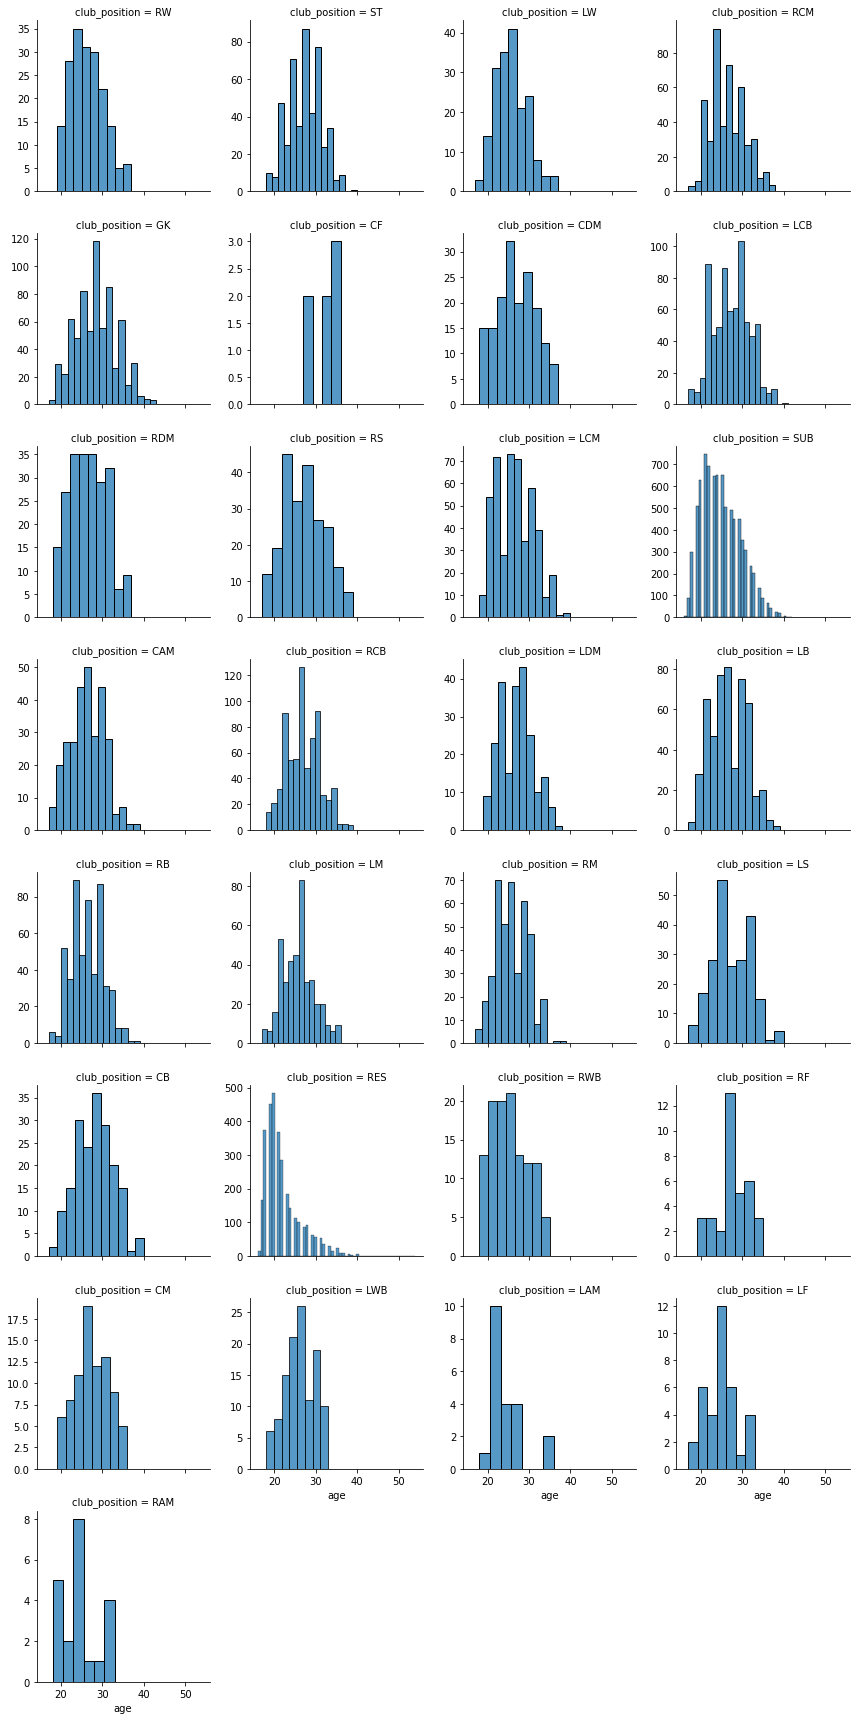

In [19]:
grid = sns.FacetGrid(df1, col='club_position', col_wrap = 4, sharey=False)
grid.map(sns.histplot, 'age')
plt.show()

9. Діаграма розподілу гравців за рейтингом по позиціях. 

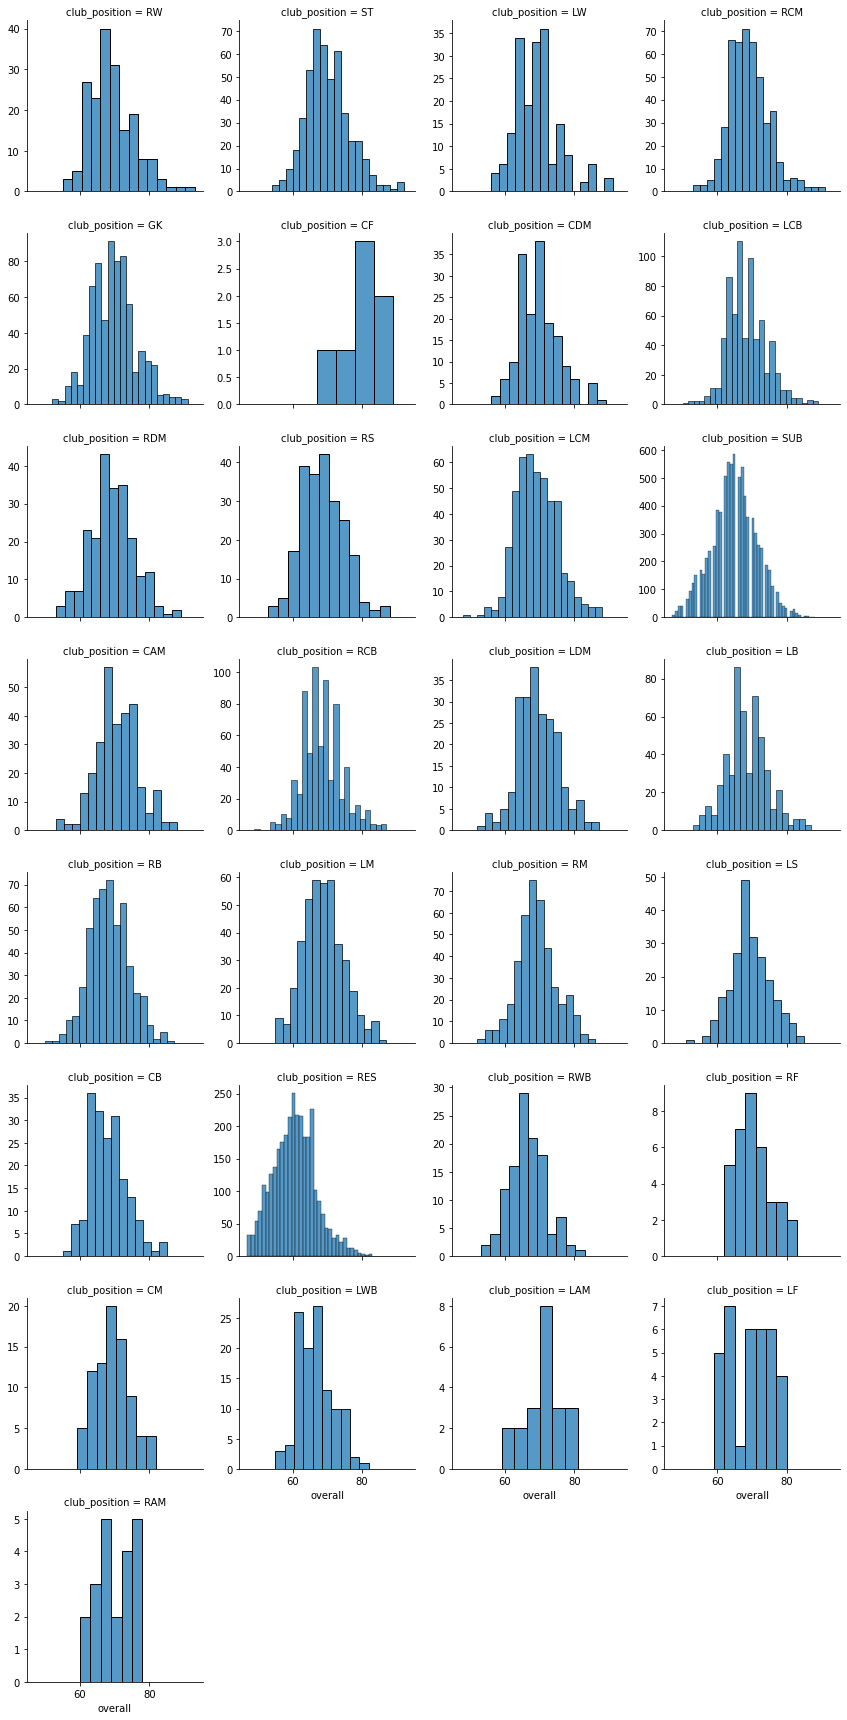

In [20]:
grid = sns.FacetGrid(df1, col='club_position', col_wrap = 4, sharey=False)
grid.map(sns.histplot, 'overall')
plt.show()

10. Діаграма розподілу національностей за рейтингом гравців.

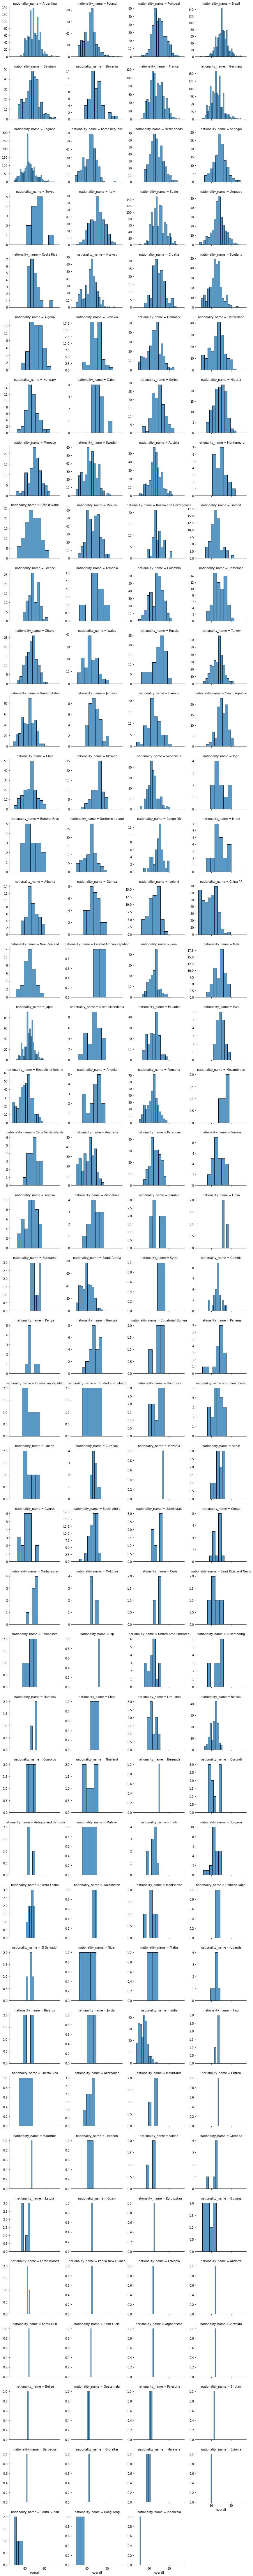

In [21]:
grid = sns.FacetGrid(df1, col='nationality_name', col_wrap = 4, sharey=False)
grid.map(sns.histplot, 'overall')
plt.show()

### Оцінювання пенальтиста
Використовуватимемо метрики shooting, attacking_heading_accuracy, power_shot_power, movement_acceleration, mentality_penalties. Ці метрики показують рівень навичок гравця у подачі м'яча у ворота, його точність удару, та швидкість руху. Чим швидше відбудеться удар, тим менше часу буде у воротаря щоб зреагувати.

In [22]:
df1['penalty_score'] = df1.apply(lambda row: row.shooting + row.attacking_heading_accuracy + 
                                  row.power_shot_power + row.movement_acceleration + row.mentality_penalties, axis = 1)

C:\Users\Genia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Оцінювання воротаря
Використовуватимемо метрики movement_agility, movement_reactions, power_jumping, goalkeeping_reflexes, mentality_penalties. Для відбиття пенальті потрібні висока швидкість реакції, рефлекси, та рухливість.

In [23]:
df1['penalty_gk_score'] = df1.apply(lambda row: row.movement_agility + row.movement_reactions + 
                                  row.power_jumping + row. goalkeeping_reflexes + row.mentality_penalties
                                    if row.club_position == "GK" else 0, axis = 1)

C:\Users\Genia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df1.nlargest(10, 'penalty_score')['club_name']

2        Manchester United
1        FC Bayern München
25                 Chelsea
36                   Lazio
9        Tottenham Hotspur
6      Paris Saint-Germain
23      Atlético de Madrid
11          Real Madrid CF
60          Leicester City
135             RB Leipzig
Name: club_name, dtype: object

In [25]:
df1.nlargest(10, 'penalty_gk_score')['club_name']

18             Manchester City
7            FC Bayern München
31           Tottenham Hotspur
169                    Everton
304    Levante Unión Deportiva
21         Paris Saint-Germain
5           Atlético de Madrid
226         Olympique Lyonnais
403             Galatasaray SK
205                       Roma
Name: club_name, dtype: object

За допомогою інформації з цього датафрейму(метрик overall_rating, value, potential) можна дослідити які гравці будуть найкориснішими та найвигіднішими для придбання. 
Також через метрики навичок можна дізнатися який потенціал мають гравці, що тільки починають професійно грати.
Дослідивши інформацію про конкретні клуби, можна передбачити яка команда виграє в матчі, якщо робиться ставка.

### Data preparation

In [46]:
# get columns names for target
targetCols = list(df1['club_position'].unique())
targetCols = [x for x in targetCols if str(x) != 'nan']
targetCols.remove('SUB')
targetCols.remove('RES')

# create and fill target dataframe
positions = {key: np.zeros(19239) for key in targetCols}
for index, row in df1.iterrows():
    for col in row['player_positions'].split(', '):
        positions[col][index] = 1        
Y = pd.DataFrame(positions)

# remove columns that are empty
Y = Y.drop(columns=Y.sum()[Y.sum() == 0].index)

X = df1.drop('player_positions', axis=1)
Y

,RW,ST,LW,GK,CF,CDM,CAM,LB,RB,LM,RM,CB,RWB,CM,LWB
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19237,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Перевіряємо NaN значення

In [47]:
X = X.drop(['club_position', 'nation_position'], axis=1)
X.isnull().sum()[X.isnull().sum()>0]

value_eur                       74
wage_eur                        61
club_name                       61
league_name                     61
league_level                    61
club_loaned_from             18137
club_joined                   1163
club_jersey_number              61
club_contract_valid_until       61
nation_team_id               18480
nation_jersey_number         18480
release_clause_eur            1176
player_tags                  17798
player_traits                 9841
pace                          2132
shooting                      2132
passing                       2132
dribbling                     2132
defending                     2132
physic                        2132
goalkeeping_speed            17107
club_logo_url                   61
nation_logo_url              18480
penalty_score                 2132
dtype: int64

Колонки, які ніяк не допоможуть в визначенні позиції, можна видалити

In [48]:
X = X.drop(['club_loaned_from', 'nation_team_id', 'nation_jersey_number', 'player_tags', 'nation_logo_url',
               'player_traits'], axis=1)

Перевіряємо колонки з типом object

In [49]:
X.select_dtypes(include="object")

,short_name,club_name,league_name,club_joined,nationality_name,preferred_foot,work_rate,body_type,player_face_url,club_logo_url,nation_flag_url
0,L. Messi,Paris Saint-Germain,French Ligue 1,2021-08-10,Argentina,Left,Medium/Low,Unique,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/ar.png
1,R. Lewandowski,FC Bayern München,German 1. Bundesliga,2014-07-01,Poland,Right,High/Medium,Unique,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/pl.png
2,Cristiano Ronaldo,Manchester United,English Premier League,2021-08-27,Portugal,Right,High/Low,Unique,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/pt.png
3,Neymar Jr,Paris Saint-Germain,French Ligue 1,2017-08-03,Brazil,Right,High/Medium,Unique,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/br.png
4,K. De Bruyne,Manchester City,English Premier League,2015-08-30,Belgium,Right,High/High,Unique,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,Wuhan FC,Chinese Super League,2021-04-01,China PR,Right,Medium/Medium,Lean (170-185),https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png
19235,C. Porter,Derry City,Rep. Ireland Airtricity League,2021-02-22,Republic of Ireland,Right,Medium/Medium,Lean (170-185),https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png
19236,N. Logue,Finn Harps,Rep. Ireland Airtricity League,2021-06-18,Republic of Ireland,Right,Medium/Medium,Lean (170-185),https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png
19237,L. Rudden,Finn Harps,Rep. Ireland Airtricity League,2021-06-18,Republic of Ireland,Right,Medium/Medium,Lean (170-185),https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png


Колонки, які ніяк не допоможуть в визначенні позиції, можна видалити

In [50]:
X = X.drop(['short_name', 'club_name', 'league_name', 'club_joined', 'nationality_name','player_face_url',
           'club_logo_url', 'nation_flag_url', 'club_contract_valid_until'], axis=1)

Застосовуємо енкодинг до колонок, які можуть бути важливими:

In [51]:
X['body_type'].unique()

array(['Unique', 'Normal (170-185)', 'Lean (170-185)', 'Normal (185+)',
       'Lean (185+)', 'Normal (170-)', 'Stocky (185+)', 'Lean (170-)',
       'Stocky (170-185)', 'Stocky (170-)'], dtype=object)

In [52]:
X['body_type'] = X['body_type'].map({
    'Lean (170-)': 0,
    'Lean (170-185)': 1,
    'Lean (185+)': 2,
    'Normal (170-)': 3,
    'Normal (170-185)': 4, 
    'Normal (185+)': 5,
    'Stocky (170-)': 6,
    'Stocky (170-185)': 7,
    'Stocky (185+)': 8,
    'Unique': 9,
})

In [53]:
X['work_rate'].unique()

array(['Medium/Low', 'High/Medium', 'High/Low', 'High/High',
       'Medium/Medium', 'Medium/High', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

In [54]:
left_work_rate = []
right_work_rate = []

for index, row in X.iterrows():
    wr = row['work_rate'].split('/')
    left_work_rate.append(wr[0])
    right_work_rate.append(wr[1])
    
X = X.drop('work_rate', axis=1)
wr_dict = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

X['left_work_rate'] = left_work_rate
X['right_work_rate'] = right_work_rate

X['left_work_rate'] = X['left_work_rate'].map(wr_dict)
X['right_work_rate'] = X['right_work_rate'].map(wr_dict)

In [55]:
X['preferred_foot'] = X['preferred_foot'].map({'Right': 0, 'Left': 1})

In [56]:
X.isnull().sum()[X.isnull().sum()>0]

value_eur                74
wage_eur                 61
league_level             61
club_jersey_number       61
release_clause_eur     1176
pace                   2132
shooting               2132
passing                2132
dribbling              2132
defending              2132
physic                 2132
goalkeeping_speed     17107
penalty_score          2132
dtype: int64

In [57]:
X['goalkeeping_speed'].describe()

count    2132.000000
mean       36.439962
std        10.751563
min        15.000000
25%        27.000000
50%        36.000000
75%        45.000000
max        65.000000
Name: goalkeeping_speed, dtype: float64

Замінюємо NaN значення в колонках, що залишились

In [58]:
X['league_level'] = X['league_level'].fillna(X['league_level'].mode()[0])
X['club_jersey_number'] = X['club_jersey_number'].fillna(X['club_jersey_number'].mode()[0])

X['release_clause_eur'] = pd.Series(np.log(X['release_clause_eur'])).fillna(X['release_clause_eur'].mean())
X['value_eur'] = pd.Series(np.log(X['value_eur'])).fillna(X['value_eur'].mean())
X['wage_eur'] = pd.Series(np.log(X['wage_eur'])).fillna(X['wage_eur'].mean())

X['pace'] = X['pace'].fillna(0)
X['shooting'] = X['shooting'].fillna(0)
X['passing'] = X['passing'].fillna(0)
X['dribbling'] = X['dribbling'].fillna(0)
X['defending'] = X['defending'].fillna(0)
X['physic'] = X['physic'].fillna(0)
X['goalkeeping_speed'] = X['goalkeeping_speed'].fillna(0)
X['penalty_score'] = X['penalty_score'].fillna(0)

In [59]:
X.isnull().sum()[X.isnull().sum()>0]

Series([], dtype: int64)

In [60]:
len(X.columns)

59

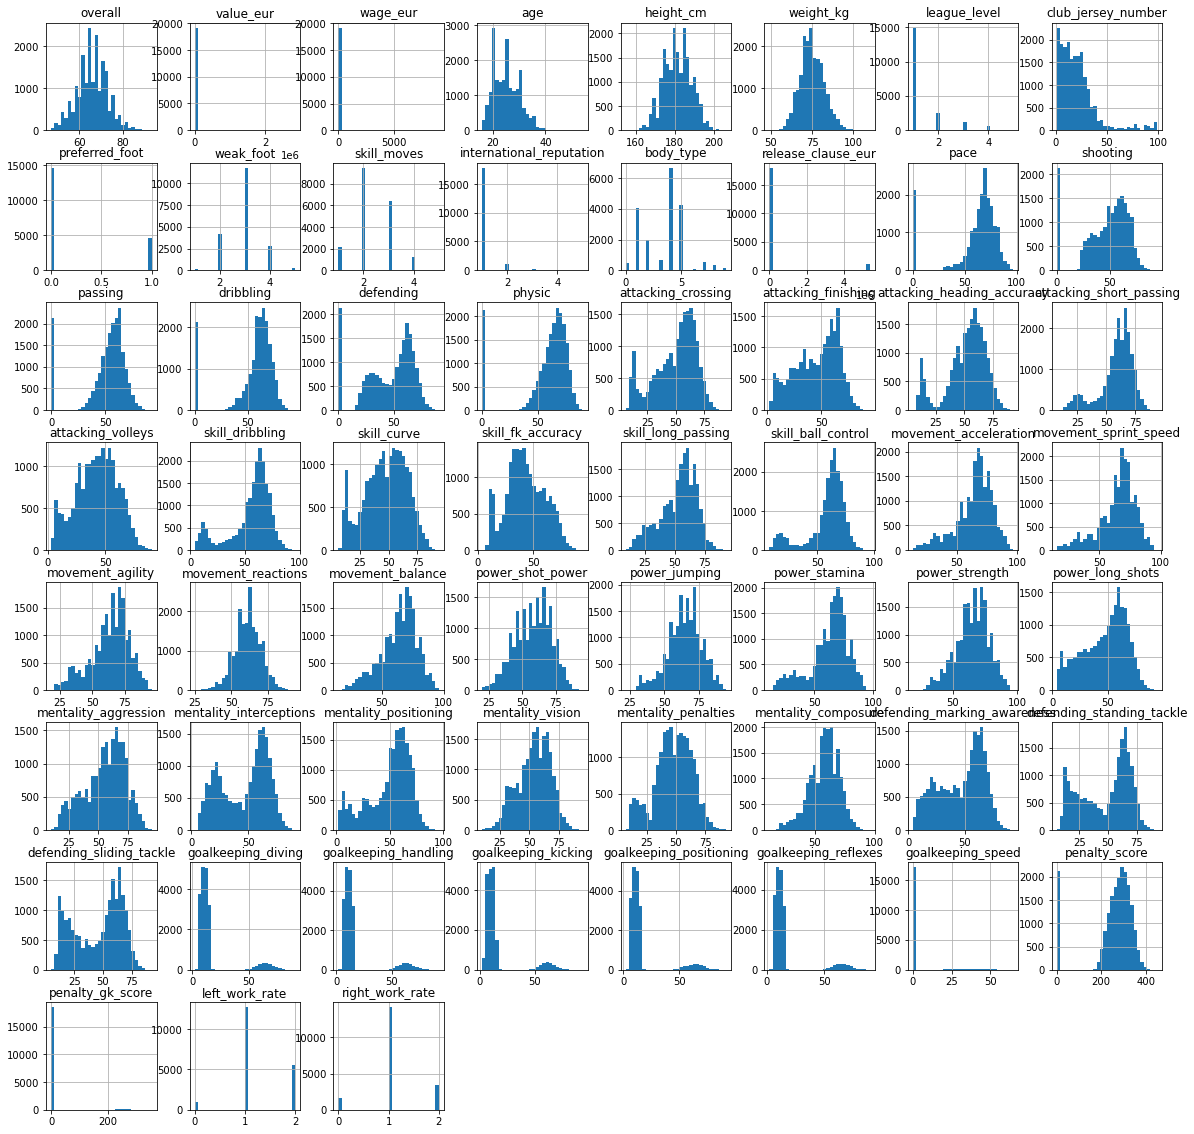

In [61]:
X.hist(bins=30, figsize=(20, 20))
plt.show()

### Feature engineering

In [62]:
uniform = np.random.uniform(len(X))
X['random_value'] = uniform

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

Обчислюємо ваги атрибутів за допомогою Random Forest:

In [64]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=300, max_depth=7))
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                       n_estimators=300))

In [66]:
weights_per_feature = {key: [] for key in model.estimators_[0].feature_names_in_}


for estimator in model.estimators_:
    for i in range(len(estimator.feature_names_in_)):
        weights_per_feature[estimator.feature_names_in_[i]].append(estimator.feature_importances_[i])
print(weights_per_feature)



{'overall': [0.007448050948707306, 0.003138627871633341, 0.006366374237521324, 0.0, 0.011134470830676013, 0.010115159474782405, 0.009157609222783997, 0.0033135596060774406, 0.00286186566578486, 0.004952034492993349, 0.006030085001878349, 0.002436257273655685, 0.009913490739782083, 0.02168473170137014, 0.007076371427258136], 'value_eur': [0.008253747964922143, 0.0017048589633013873, 0.009478203211625577, 0.0, 0.01208269690555822, 0.0046327759998966225, 0.0048928500608766395, 0.0040680657844295995, 0.0031113124527699463, 0.004674582983833632, 0.006025183886251328, 0.002119890284184077, 0.01196968054638346, 0.009133936794637058, 0.007897180574534765], 'wage_eur': [0.0078342351966176, 0.0008168521015082852, 0.007622034890381094, 0.0, 0.010633884754778288, 0.0041586036835173, 0.004496906895001262, 0.0015893570957097962, 0.0020976139329006256, 0.0040764584214165464, 0.004261859360144699, 0.0011063131729286966, 0.01128172138918972, 0.004144137711169216, 0.008407103337698382], 'age': [0.006951

Сортуємо ваги:

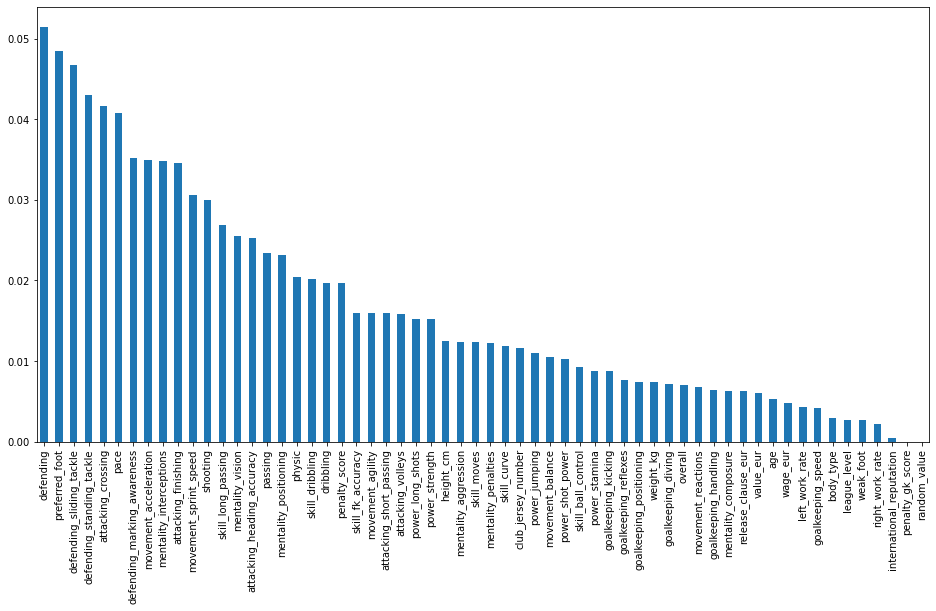

In [67]:
mean_weight_per_feature = pd.Series([np.mean(weights_per_feature[key]) for key in X.columns], index = X.columns)
#sns.barplot(mean_weight_per_feature)
mean_weight_per_feature = mean_weight_per_feature.sort_values(ascending=False)
mean_weight_per_feature.plot.bar(figsize = (16, 8))
plt.show()

In [68]:
X[mean_weight_per_feature.iloc[:20].index.to_numpy()]

,defending,preferred_foot,defending_sliding_tackle,defending_standing_tackle,attacking_crossing,pace,defending_marking_awareness,movement_acceleration,mentality_interceptions,attacking_finishing,movement_sprint_speed,shooting,skill_long_passing,mentality_vision,attacking_heading_accuracy,passing,mentality_positioning,physic,skill_dribbling,dribbling
0,34.0,1,24,35,85,85.0,20,91,40,95,80,92.0,91,95,70,91.0,93,65.0,96,95.0
1,44.0,0,19,42,71,78.0,35,77,49,95,79,92.0,70,81,90,79.0,95,82.0,85,86.0
2,34.0,0,24,32,87,87.0,24,85,29,95,88,94.0,77,76,90,80.0,95,75.0,88,88.0
3,37.0,0,29,32,85,91.0,35,93,37,83,89,83.0,81,90,63,86.0,86,63.0,95,94.0
4,64.0,0,53,65,94,76.0,68,76,66,82,76,86.0,93,94,55,93.0,88,78.0,88,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,42.0,0,48,43,46,58.0,38,56,42,32,60,35.0,48,43,48,46.0,38,49.0,45,48.0
19235,41.0,0,47,44,54,59.0,37,60,39,33,58,39.0,50,49,46,50.0,51,51.0,41,46.0
19236,41.0,0,48,44,39,60.0,38,60,38,32,60,37.0,49,46,43,45.0,45,52.0,47,49.0
19237,15.0,0,11,14,29,68.0,10,69,14,49,67,46.0,33,40,40,36.0,47,42.0,42,48.0


Будуємо модель, взявши 20 вагів, які найбільше впливають

In [69]:
model = MultiOutputClassifier(XGBClassifier(seed=0))
score = cross_val_score(model, X[mean_weight_per_feature.iloc[:20].index.to_numpy()], Y, cv=8, scoring = make_scorer(hamming_loss,greater_is_better=True),
                       n_jobs = 4)


Loss моделі:

In [70]:
print(score)
print(np.mean(score))

[0.07744976 0.06497574 0.06486486 0.06486486 0.06467082 0.06345114
 0.06065142 0.05745979]
0.06479855127109703


In [71]:
model = MultiOutputClassifier(XGBClassifier(seed=0))
score = cross_val_score(model, X[mean_weight_per_feature.iloc[:20].index.to_numpy()], Y, cv=8, scoring = 'accuracy',
                       n_jobs = 4)
print(score)
print(np.mean(score))

[0.4024948  0.46611227 0.45322245 0.45821206 0.45363825 0.45072765
 0.45945946 0.43344426]
0.44716390042929144


Accuracy для кожної позиції:

In [72]:
for i in range(0, 15):
    model = XGBClassifier(seed=0)
    score = cross_val_score(model, X[mean_weight_per_feature.iloc[:20].index.to_numpy()], Y.iloc[:, i], cv=8, scoring = 'accuracy',
                       n_jobs = 4)
    #print("Score for " + str(Y.columns[i]) + " " + score)
    print("Mean score for ", Y.columns[i], " ", np.mean(score))

Mean score for  RW   0.9291029157917677
Mean score for  ST   0.9454223902643204
Mean score for  LW   0.9210467827356347
Mean score for  GK   1.0
Mean score for  CF   0.9539488932167801
Mean score for  CDM   0.8999926923595809
Mean score for  CAM   0.8815432136667578
Mean score for  LB   0.947293254312805
Mean score for  RB   0.946513174508183
Mean score for  LM   0.8589849384774509
Mean score for  RM   0.8670933060284142
Mean score for  CB   0.9363762881337756
Mean score for  RWB   0.9706328632805338
Mean score for  CM   0.8960935689305074
Mean score for  LWB   0.9710485772153825
